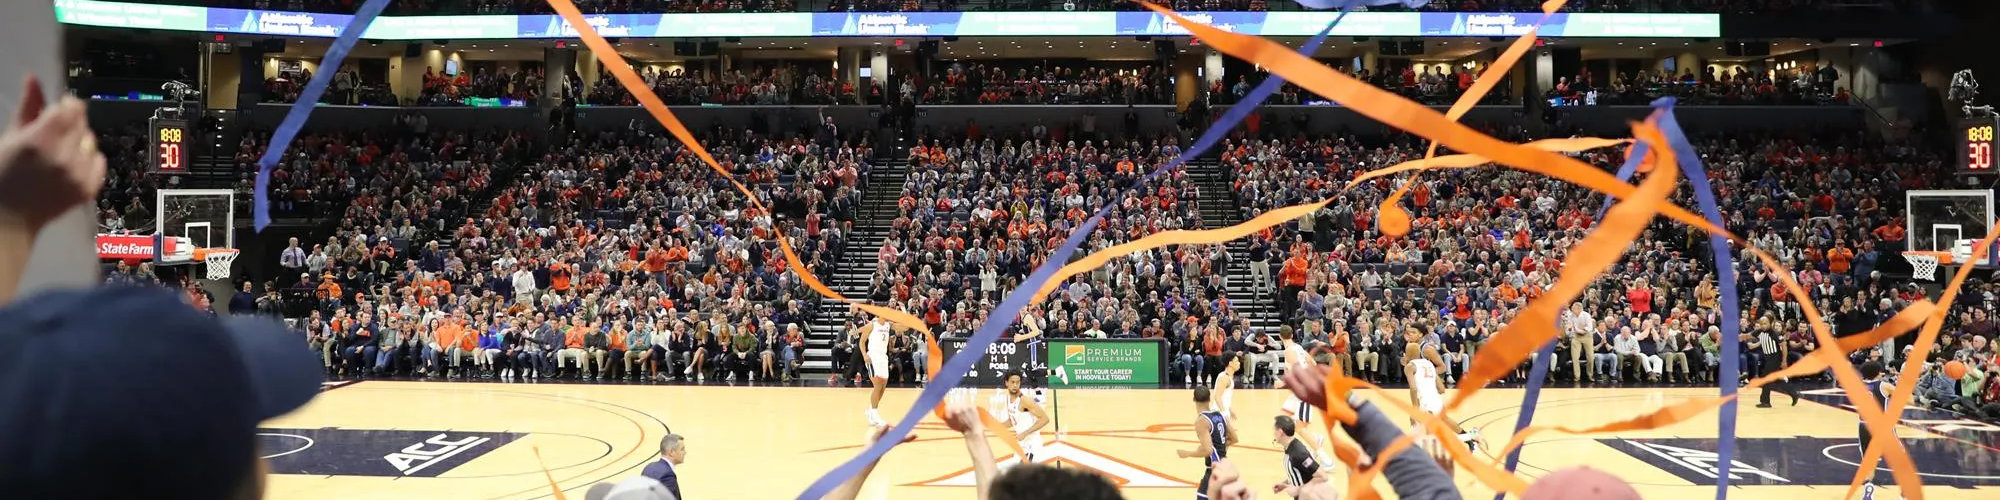
Image Source: https://virginiasports.com/john-paul-jones-arena/

# ML4VA Project – NCAA Basketball Focus

*So long are the glory days of UVA basketball. The Virginia community has faced two years of disappointment and sadness, and we have set out to put a stop to it. With the help of machine learning, we can evaluate each player’s performance to provide better insights that will hopefully improve the overall performance of the team.*

## Step 1. Get the data

In [25]:
import pandas as pd
import numpy as np

def load_cbb_game_data(file="cbb_games_13-19.csv"):
    """Load college basketball player data into workspace from a csv."""
    return pd.read_csv(file)

def load_cbb_player_data(file="cbb_players_09-22.csv"):
    """Load college basketball player data into workspace from a csv."""
    return pd.read_csv(file)

cbb13_20_games = load_cbb_game_data()
cbb20_games = load_cbb_game_data("cbb_games_20.csv")
cbb21_games = load_cbb_game_data("cbb_games_21.csv")
cbb22_games = load_cbb_game_data("cbb_games_22.csv")
cbb_players = load_cbb_player_data()

<ipython-input-25-a7ff56ea798c>:16: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  cbb_players = load_cbb_player_data()


As the college basketball games from 2020 to 2022 were provided as extra datasets, we need to merge those into the dataset containing the data from 2009 to 2019. Therefore we need to analyze which columns are either missing or are too much.

In [26]:
print(f'Columns too much in CBB20: {list(cbb20_games.columns.difference(cbb13_20_games.columns))}')
print(f'Columns lacking from CBB20: {list(cbb13_20_games.columns.difference(cbb20_games.columns))}')
print(f'Columns too much in CBB21: {list(cbb21_games.columns.difference(cbb13_20_games.columns))}')
print(f'Columns lacking from CBB21: {list(cbb13_20_games.columns.difference(cbb21_games.columns))}')
print(f'Columns too much in CBB22: {list(cbb22_games.columns.difference(cbb13_20_games.columns))}')
print(f'Columns lacking from CBB22: {list(cbb13_20_games.columns.difference(cbb22_games.columns))}')

Columns too much in CBB20: ['RK']
Columns lacking from CBB20: ['POSTSEASON', 'SEED', 'YEAR']
Columns too much in CBB21: []
Columns lacking from CBB21: ['POSTSEASON', 'YEAR']
Columns too much in CBB22: []
Columns lacking from CBB22: []


The rank given in the RK of the 2020 dataset lists the sort order of the games of the website from which the data was retrieved. We will remove this column to align it with the large dataset.

POSTSEASON and SEED are missing from the 2020 data set because the NCAA March Madness Tournament was cancelled at that time due to the Covid-19 pandemic. We will add those columns with NA as its data.

POSTSEASON is missing from the 2021 data set, as at the time it was scraped, the results weren't available yet. Since they are now available, we will add them in the next step.

The YEAR column is not included in both the 2020 and 2021 datasets because it contains only those years. In the next step, we will add the year information for these as well.

Since the 2022 dataset was tapped directly from the website, we have already put it into the correct form. Therefore, all columns are present.

In [27]:
# Drop the RK column from the 2020 data set.
cbb20_games.drop('RK', axis=1, inplace=True, errors='ignore')

# Add the YEAR column to the data sets.
cbb20_games['YEAR'] = 2020;
cbb21_games['YEAR'] = 2021;

# Add the POSTSEASON and SEED column to the 2020 data set. Set all rows to NA.
cbb20_games['POSTSEASON'] = np.NaN;
cbb20_games['SEED'] = np.NaN;

# Add the POSTSEASON column to the 2021 data set. Initialize with NA and add 
# results.
cbb21_games['POSTSEASON'] = np.NaN;
# Count the lines with missing data before.
num_before = sum(cbb21_games['POSTSEASON'].isnull().values.ravel())
# Set the results manually.
cbb21_games.loc[cbb21_games['TEAM'] == 'Gonzaga' , 'POSTSEASON'] = '2ND'
cbb21_games.loc[cbb21_games['TEAM'] == 'Baylor' , 'POSTSEASON'] = 'Champion'
cbb21_games.loc[cbb21_games['TEAM'] == 'Houston' , 'POSTSEASON'] = 'F4'
cbb21_games.loc[cbb21_games['TEAM'] == 'Illinois' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Michigan' , 'POSTSEASON'] = 'E8'
cbb21_games.loc[cbb21_games['TEAM'] == 'Iowa' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'USC' , 'POSTSEASON'] = 'E8'
cbb21_games.loc[cbb21_games['TEAM'] == 'Colorado' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Alabama' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'Florida St.' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'Ohio St.' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Wisconsin' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Loyola Chicago' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'Villanova' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'Connecticut' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Texas Tech' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'San Diego St.' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'UCLA' , 'POSTSEASON'] = 'F4'
cbb21_games.loc[cbb21_games['TEAM'] == 'Texas' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'West Virginia' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'LSU' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Virginia' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Creighton' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'BYU' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Arkansas' , 'POSTSEASON'] = 'E8'
cbb21_games.loc[cbb21_games['TEAM'] == 'Tennessee' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Purdue' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Oregon' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'Kansas' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Georgia Tech' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Maryland' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'St. Bonaventure' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Oklahoma St.' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'North Carolina' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Syracuse' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'Oklahoma' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Florida' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Missouri' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Rutgers' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'VCU' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Clemson' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Utah St.' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Virginia Tech' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Georgetown' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Oregon St.' , 'POSTSEASON'] = 'E8'
cbb21_games.loc[cbb21_games['TEAM'] == 'Michigan St.' , 'POSTSEASON'] = 'R68'
cbb21_games.loc[cbb21_games['TEAM'] == 'Wichita St.' , 'POSTSEASON'] = 'R68'
cbb21_games.loc[cbb21_games['TEAM'] == 'UC Santa Barbara' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Ohio' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Drake' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Colgate' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'North Texas' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Eastern Washington' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Liberty' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Winthrop' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Abilene Christian' , 'POSTSEASON'] = 'R32'
cbb21_games.loc[cbb21_games['TEAM'] == 'Grand Canyon' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'UNC Greensboro' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Oral Roberts' , 'POSTSEASON'] = 'S16'
cbb21_games.loc[cbb21_games['TEAM'] == 'Morehead St.' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Iona' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Drexel' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Cleveland St.' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Hartford' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Norfolk St.' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == 'Texas Southern' , 'POSTSEASON'] = 'R64'
cbb21_games.loc[cbb21_games['TEAM'] == "Mount St. Mary's" , 'POSTSEASON'] = 'R68'
cbb21_games.loc[cbb21_games['TEAM'] == 'Appalachian St.' , 'POSTSEASON'] = 'R68'
# Count the number of lines with missing data after.
num_after = sum(cbb21_games['POSTSEASON'].isnull().values.ravel())
assert(num_before - num_after == 68)

# Order the columns the same way as in the large dataset.
cbb20_games = cbb20_games[cbb13_20_games.columns]
cbb21_games = cbb21_games[cbb13_20_games.columns]

# Concatenate the datasets.
cbb_games = pd.concat([cbb13_20_games, cbb20_games, cbb21_games, cbb22_games])

We will now inspect the columns of the player data set.

In [28]:
cbb_players.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

Let's rename the unnamed feature 64. Also feature 65 is unkown to us, we can't match it to any data that is given by the website, the data was scraped from. We will therefore drop it.

In [29]:
cbb_players.rename(columns = {'Unnamed: 64' : 'role'}, inplace=True, errors='ignore')
cbb_players.drop(columns = {'Unnamed: 65'}, inplace=True, errors='ignore')
cbb_players.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'role'],
      dtype='object')

Next, let's investigate how many rows in each year is missing data in the player data set.

In [30]:
cbb_players["year"].value_counts().sort_index()

2009    4589
2010    4698
2011    4548
2012    4586
2013    4608
2014    4722
2015    4724
2016    4697
2017    4743
2018    4703
2019    4740
2020    4733
2021    4970
2022    3978
Name: year, dtype: int64

In [31]:
df = pd.DataFrame(columns=cbb_players.columns.insert(0, "YEAR"))

for yr in range(2009, 2023):
  res1 = cbb_players[cbb_players["year"] == yr].isna().sum()
  res1["YEAR"] = yr
  df = df.append(res1, ignore_index = True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df

<ipython-input-31-88def0e1dcc2>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,YEAR,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
0,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4588,0,0,0,0,0,0,3088,353,4589,4589,4589,4589,4589,4589,4589,4589,4589,4451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4589
1,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,29,46,0,0,0,0,0,0,3128,366,151,151,151,151,452,411,151,151,2517,4559,29,29,29,29,29,29,29,29,27,29,29,27,27,27,27,27,27,27,33
2,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,2,2,0,0,0,0,0,0,3024,318,101,101,101,101,390,348,101,101,2433,4421,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5
3,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,3,4,0,0,0,0,0,0,3048,326,133,133,133,133,430,409,133,133,2407,4454,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,9
4,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,0,1,0,0,0,0,0,0,3238,356,127,127,127,127,434,421,127,127,2357,4489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
5,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,2,2,0,0,0,0,0,0,3338,407,146,146,146,146,460,456,146,146,2441,4611,4,4,4,4,4,4,4,4,2,4,4,2,2,2,2,2,2,2,16
6,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,0,3,0,0,0,0,0,0,3368,309,125,125,125,125,446,480,125,125,2447,4616,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,8
7,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,3343,376,118,118,118,118,417,441,118,118,2354,4588,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,3369,332,139,139,139,139,470,507,139,139,2349,4628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
9,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,3337,324,129,129,129,129,411,506,129,129,2324,4594,2,2,2,2,2,2,2,2,1,2,2,1,1,1,1,1,1,1,1


We can spot from this, that in 2009 some features weren't recorded yet and it seems that those were added in 2010. Also to better align our player data with the team game data, we will drop the years from 2009 to 2012 from it.

In [32]:
cbb_players[cbb_players["year"] > 2021].head(10)

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
61061,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,1,2,0.500,2,8,0.250,7,28,0.250,0.0,0.9,5.6,Sr,Jun-00,0,-1.110000,57.5491,2.8,2022,39014,all,NaN,0.384583,2.0,4.0,0.0,4.0,0.5000,0.0000,0.0,0.0,NaN,NaN,110.1920,116.0180,0.450228,21.5242,-11.23760,-7.657450,-3.580200,-11.90720,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G
61062,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,31,36,0.861,62,129,0.481,58,147,0.395,0.3,1.4,13.0,Sr,4-Jun,5,2.977030,111.4260,3.5,2022,40204,all,92.8,0.586950,14.0,26.0,48.0,103.0,0.5385,0.4660,0.0,0.0,NaN,NaN,111.7920,104.3060,2.610670,114.5310,1.06444,2.419920,-1.355480,1.87461,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G
61063,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,9.1,12.6,8.9,17.2,73,92,0.793,127,231,0.550,0,3,0.000,0.7,2.4,39.3,Sr,3-Jun,1,3.097360,116.1010,3.3,2022,41728,all,74.0,0.479167,101.0,153.0,39.0,99.0,0.6601,0.3939,4.0,4.0,1.0,NaN,102.6870,101.1810,2.618340,115.7970,1.20190,1.147480,0.054417,2.45207,29.3000,2.787850,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G
61064,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,5.8,23.0,7.5,13.0,48,53,0.906,71,139,0.511,52,131,0.397,0.3,1.5,19.6,Sr,7-Jun,41,3.277890,123.8120,2.6,2022,44216,all,65.0,0.828488,38.0,59.0,33.0,80.0,0.6441,0.4125,3.0,5.0,0.6,NaN,94.5248,89.0636,3.246900,156.5940,5.48359,4.021870,1.461720,6.94537,24.5000,5.223790,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4
61065,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,7.0,13.7,10.2,20.7,18,29,0.621,38,74,0.514,4,21,0.190,1.5,2.9,30.5,Sr,9-Jun,24,0.435561,93.2541,4.9,2022,44217,all,77.4,0.959981,18.0,30.0,20.0,43.0,0.6000,0.4651,0.0,0.0,NaN,NaN,100.1820,93.0315,1.863740,94.0276,2.45292,-0.559305,3.012220,1.49355,15.8966,-1.253220,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F
61066,Jailyn Ingram,Georgia,SEC,18,59.2,98.4,23.5,46.0,47.59,5.3,22.7,14.7,15.6,16,22,0.727,48,116,0.414,25,70,0.357,1.8,1.8,11.8,Sr,7-Jun,15,1.362700,100.9680,2.8,2022,44344,all,NaN,1.187556,26.0,45.0,22.0,71.0,0.5778,0.3099,4.0,5.0,0.8,NaN,97.3568,100.2720,2.340240,92.9410,0.27805,-0.491247,0.769296,1.49149,23.9545,1.329120,0.162368,1.2727,4.7273,6.0000,1.7273,0.9091,0.4091,12.4091,Stretch 4
61067,Quentin Jackson Jr.,Loyola Marymount,WCC,6,11.4,95.7,13.5,47.6,50.22,1.3,3.8,9.6,21.6,3,4,0.750,4,12,0.333,4,9,0.444,0.0,2.3,19.0,Sr,2-Jun,10,0.208556,88.8262,4.8,2022,44346,all,63.6,1.000000,2.0,7.0,2.0,5.0,0.2857,0.4000,0.0,0.0,NaN,NaN,102.5480,98.7567,1.664680,16.6815,-1.30996,-0.443156,-0.866807,-2.28228,16.8333,-3.100190,0.817904,0.1667,0.5000,0.6667,0.8333,0.6667,0.0000,3.8333,Scoring PG
61068,Charlie Moore,Miami FL,ACC,16,67.1,96.3,26.6,47.4,50.23,2.5,9.6,28.2,21.9,32,42,0.762,57,128,0.445,28,81,0.346,0.0,1.9,20.1,Sr,11-May,11,2.683620,109.5640,2.9,2022,44420,all,86.0,1.264151,34.0,73.0,23.0,56.0,0.4658,0.4107,0.0,0.0,NaN,NaN,103.6000,98.3411,3.192160,87.1473,2.09523,2.115180,-0.019958,1.41982,32.3125,1.580120,-0.160305,0.7500,2.8750,3.6250,4.1875,1.0625,0.0000,14.3750,Scoring PG
61069,Ben Shungu,Vermont,AE,15,73.0,114.7,20.4,51.9,59.99,2.3,15.9,23.0,18.6,51,59,0.864,36,64,0.563,13,43,0.302,1.1,1.6,55.1,Sr,2-Jun,24,2.804730,112.9550,2.8,2022,44546,all,NaN,1.892805,30.0,43.0,6.0,21.0,0.6977,0.2857,0.0,0.0,NaN,NaN,94.2022,100.3480,2.724530,84.2223,2.59788,2.352850,0.245032,3.20415,29.6667,2.205480,0.998674,0.5333,

In [33]:
cbb_players = cbb_players[cbb_players["year"] > 2012]
cbb_players["year"].value_counts().sort_index()

2013    4608
2014    4722
2015    4724
2016    4697
2017    4743
2018    4703
2019    4740
2020    4733
2021    4970
2022    3978
Name: year, dtype: int64

Lets check now for the categorial data that is in the data set.

In [34]:
cbb_players[cbb_players.select_dtypes(exclude=[np.number]).columns].head(10)

,player_name,team,conf,yr,ht,num,type,role
18421,Bobby Austin,Furman,SC,Sr,3-Jun,22,all,Wing G
18422,Anthony Marshall,UNLV,MWC,Sr,3-Jun,3,all,Pure PG
18423,Trevor Mbakwe,Minnesota,B10,Sr,8-Jun,32,all,C
18424,Justin Hawkins,UNLV,MWC,Sr,3-Jun,31,all,Combo G
18425,Tony Johnson,Lafayette,Pat,Sr,Jun-00,3,all,Pure PG
18426,Alex Smith,Bethune Cookman,MEAC,Sr,7-Jun,2,all,PF/C
18427,Isaac Sosa,Canisius,MAAC,Sr,3-Jun,22,all,Combo G
18428,Kendall Timmons,Tulane,CUSA,Sr,5-Jun,22,all,Wing G
18429,Anthony James,Northern Iowa,MVC,Sr,Jun-00,52,all,Combo G
18430,Jordan Cyphers,Tennessee St.,OVC,Sr,4-Jun,45,all,Wing G


As we can see here, the height is not encoded correctly. 6'3" were converted to 3-Jun. Also 6'0" were converted to Jun-00 somehow. We need to repair that before we move on.

In [35]:
months = {"May": 5, "Jun": 6, "Jul": 7}

def convert_date_to_height(x):
  if x == "-" or type(x) is float:
    return None

  lst = sorted(x.split("-"))
  
  if len(lst) != 2 or lst[1] == "Apr":
    return None

  inches = int(lst[0])
  foot = months[lst[1]]

  return foot * 12 + inches

cbb_players["ht"] = cbb_players["ht"].apply(convert_date_to_height)
cbb_players["ht"].head()

18421    75.0
18422    75.0
18423    80.0
18424    75.0
18425    72.0
Name: ht, dtype: float64

In [36]:
cbb_players[cbb_players.select_dtypes(exclude=[np.number, np.int64]).columns].head(10)

,player_name,team,conf,yr,num,type,role
18421,Bobby Austin,Furman,SC,Sr,22,all,Wing G
18422,Anthony Marshall,UNLV,MWC,Sr,3,all,Pure PG
18423,Trevor Mbakwe,Minnesota,B10,Sr,32,all,C
18424,Justin Hawkins,UNLV,MWC,Sr,31,all,Combo G
18425,Tony Johnson,Lafayette,Pat,Sr,3,all,Pure PG
18426,Alex Smith,Bethune Cookman,MEAC,Sr,2,all,PF/C
18427,Isaac Sosa,Canisius,MAAC,Sr,22,all,Combo G
18428,Kendall Timmons,Tulane,CUSA,Sr,22,all,Wing G
18429,Anthony James,Northern Iowa,MVC,Sr,52,all,Combo G
18430,Jordan Cyphers,Tennessee St.,OVC,Sr,45,all,Wing G


In [37]:
cbb_players["type"].value_counts()

all    46618
Name: type, dtype: int64

The type column seems to consist of one value only, we can drop it in that case.

In [38]:
cbb_players.drop(columns={"type"}, inplace=True, errors="ignore")

Let's analyze the categories of our other features.

In [39]:
cbb_players["yr"].value_counts()

Jr      12450
Sr      11387
So      11346
Fr      11266
None    10   
Name: yr, dtype: int64

In [40]:
cbb_players["role"].value_counts()

Wing G        10454
PF/C          8288 
Combo G       7409 
C             6507 
Scoring PG    4637 
Wing F        4111 
Stretch 4     2858 
Pure PG       2111 
Name: role, dtype: int64

Lets see how many unique players we have in our dataset. We are only interested in the approximate amount and do not care about duplicate names at this point.

In [41]:
len(cbb_players["player_name"].value_counts())

19113

Both seem reasonable, some players are missing the year they are in. However, since this only applies to ten of them, we will probably not make any changes here.

## Step 2. Discover and visualize the data to gain insights

In [42]:
# Lets inspect the first lines of the teams dataset.
cbb_games.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,16.1,42.0,29.7,51.8,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,18.7,32.5,29.4,28.4,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,18.6,35.8,30.2,39.8,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,18.6,41.3,25.0,34.3,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017


In [43]:
# Lets gather first insights about the teams dataset through its statistics.
cbb_games.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3513.000000,3513.000000,3513.000000,3513.00000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,612.000000,3513.000000
mean,30.353259,15.906063,102.958554,102.96049,0.494380,49.809451,49.992827,18.765329,18.698918,29.262226,29.460319,34.642727,34.911472,49.045716,49.205665,34.116254,34.294165,67.853772,-7.560262,8.802288,2017.512383
std,3.889219,6.495158,7.270783,6.53192,0.255434,3.085504,2.903593,2.102635,2.232018,4.228075,3.259914,5.499964,6.413016,3.377338,3.328567,2.769491,2.466713,3.102422,6.809257,4.674526,2.872862
min,5.000000,0.000000,76.600000,84.00000,0.005000,39.200000,39.600000,11.900000,10.200000,14.200000,18.400000,19.600000,16.500000,37.700000,37.700000,24.800000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.000000,98.30000,0.281900,47.800000,48.000000,17.300000,17.200000,26.400000,27.200000,30.800000,30.300000,46.800000,46.900000,32.200000,32.600000,65.800000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,102.600000,102.90000,0.476000,49.700000,50.000000,18.700000,18.600000,29.300000,29.400000,34.500000,34.300000,49.000000,49.200000,34.100000,34.200000,67.800000,-7.800000,9.000000,2018.000000
75%,33.000000,20.000000,107.700000,107.50000,0.714300,51.800000,52.000000,20.100000,20.100000,32.000000,31.700000,38.200000,38.900000,51.300000,51.500000,35.900000,35.900000,69.900000,-3.000000,13.000000,2020.000000
max,40.000000,38.000000,129.100000,124.00000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,40.400000,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2022.000000


In [44]:
# Lets inspect the first lines of the players dataset.
cbb_players.head(10)

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
18421,Bobby Austin,Furman,SC,29,76.4,89.5,16.9,43.9,48.40,2.7,10.1,11.2,22.4,40,47,0.851,35,108,0.324,37,98,0.378,1.0,1.8,22.8,Sr,75.0,22,-0.102170,82.9400,3.0,2013,428,NaN,0.777778,13.0,28.0,22.0,80.0,0.4643,0.2750,1.0,3.0,0.3333,NaN,111.9770,115.4580,1.10745,131.535,-5.322610,-2.455320,-2.867280,-6.048600,30.5517,-3.458630,-2.589970,0.6897,2.5172,3.2069,1.4483,0.8966,0.3103,7.6207,Wing G
18422,Anthony Marshall,UNLV,MWC,34,85.3,107.7,18.8,54.2,57.54,2.5,10.3,33.5,24.8,86,127,0.677,81,148,0.547,36,101,0.356,1.0,2.1,51.0,Sr,75.0,3,2.999640,109.2250,2.7,2013,951,85.2,2.138315,56.0,82.0,25.0,66.0,0.6829,0.3788,3.0,3.0,1.0000,NaN,94.9081,91.0936,4.12372,204.626,5.113360,3.051150,2.062210,4.791800,34.2647,2.210640,2.581160,0.7647,3.3824,4.1471,5.9118,1.2647,0.3529,10.4706,Pure PG
18423,Trevor Mbakwe,Minnesota,B10,34,62.1,107.5,22.8,56.5,58.64,15.7,24.4,9.6,22.6,97,158,0.614,121,213,0.568,0,1,0.000,6.7,1.7,73.8,Sr,80.0,32,2.979250,118.4950,4.0,2013,1985,NaN,0.528560,88.0,126.0,33.0,87.0,0.6984,0.3793,31.0,36.0,0.8611,NaN,91.4186,85.4285,3.48602,187.452,6.926840,2.735160,4.191680,6.323880,24.9118,4.162630,2.161260,3.2941,5.3824,8.6765,1.0882,0.6765,1.4412,9.9706,C
18424,Justin Hawkins,UNLV,MWC,34,55.8,93.6,14.3,39.9,42.60,3.4,8.6,14.3,16.5,26,41,0.634,30,72,0.417,26,101,0.257,2.0,3.6,23.7,Sr,75.0,31,0.346301,88.3731,2.7,2013,2201,43.4,1.903158,20.0,38.0,10.0,34.0,0.5263,0.2941,1.0,1.0,1.0000,NaN,91.9809,88.2842,2.91492,151.466,5.007310,0.830709,4.176600,3.550210,22.4118,-0.942351,4.492560,0.6765,1.8529,2.5294,1.7353,1.3824,0.4412,4.8235,Combo G
18425,Tony Johnson,Lafayette,Pat,33,78.7,119.0,23.2,59.5,63.31,2.4,12.7,33.5,18.4,89,110,0.809,135,238,0.567,29,62,0.468,0.7,3.7,36.7,Sr,72.0,3,4.165610,122.0300,2.3,2013,2615,NaN,2.164414,93.0,144.0,42.0,94.0,0.6458,0.4468,0.0,0.0,NaN,NaN,102.0260,102.3880,2.56929,200.741,5.195180,4.964640,0.230538,5.692660,31.6061,4.211170,1.481490,0.6061,3.2424,3.8485,4.7879,1.9394,0.2121,13.5152,Pure PG
18426,Alex Smith,Bethune Cookman,MEAC,32,55.0,104.8,15.2,57.7,56.96,9.4,20.9,7.1,19.8,27,54,0.500,82,141,0.582,0,1,0.000,9.6,1.9,38.0,Sr,79.0,2,0.925796,96.0225,4.4,2013,3902,NaN,0.638933,62.0,99.0,20.0,42.0,0.6263,0.4762,31.0,34.0,0.9118,NaN,95.7473,100.9910,1.90315,158.602,2.126950,-1.865140,3.992090,0.854745,22.1875,-0.442838,1.297580,1.9688,3.6875,5.6562,0.7188,0.7188,1.8750,5.9688,PF/C
18427,Isaac Sosa,Canisius,MAAC,34,62.8,121.6,19.3,59.0,60.24,2.9,6.5,9.2,12.6,26,32,0.813,41,79,0.519,95,232,0.409,0.6,1.1,10.3,Sr,75.0,22,3.247670,121.1340,2.0,2013,4377,48.0,1.057121,16.0,29.0,25.0,50.0,0.5517,0.5000,0.0,0.0,NaN,NaN,109.2770,109.2910,1.44920,117.818,1.787560,4.753010,-2.965450,4.494150,25.3235,5.947890,-1.453740,0.6176,1.3824,2.0000,1.0882,0.4706,0.1471,11.5588,Combo G
18428,Kendall Timmons,Tulane,CUSA,34,73.9,98.0,18.6,40.3,49.17,5.3,13.2,15.3,20.7,116,170,0.682,71,177,0.401,8,29,0.276,1.1,2.7,82.5,Sr,77.0,22,1.226130,95.8580,2.7,2013,4386,4.8,1.156237,52.0,99.0,19.0,78.0,0.5253,0.2436,6.0,8.0,0.7500,NaN,100.4760,102.2100,2.43028,180.522,0.859241,-0.013761,0.873002,0.399911,29.5588,-0.239369,0.639281,1.3824,3.0000,4.3824,2.1765,1.2941,0.2647,8.2941,Wing G
18429,Anthony James,Northern Iowa,MVC,31,72.1,93.5,25.7,48.6,51.81,0.7,13.8,16.3,19.2,66,88,0.750,109,244,0.447,41,107,0.383,0.1,1.7,25.1,Sr,72.0,52,2.167000,103.5970,1.8,2013,4416,NaN,0.844156,49.0,80.0,60.0,164.0,0.6125,0.3659,0.0,0.0,NaN,NaN,98.5544,94.3781,3.46911,162.767,-0.830638,-0.976102,0.145464,0.212569,31.9677,-0.067887,0.280456,0.1613,3.5161,3.6774,2.0968,0.8710,0.0323,13.1290

In [45]:
# Lets gather first insights about the player dataset through its statistics.
cbb_players.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,ht,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46380.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,13525.000000,42676.000000,44898.000000,44898.000000,44898.000000,44898.000000,41738.000000,41328.000000,44898.000000,44898.000000,22889.000000,899.000000,46416.000000,46416.000000,46416.000000,46416.000000,46416.000000,46416.000000,46416.000000,46416.000000,46423.000000,46416.000000,46416.000000,46423.000000,46423.000000,46423.000000,46423.000000,46423.000000,46423.000000,46423.000000
mean,21.992986,36.917386,92.160015,18.050742,44.800446,47.801935,5.343037,12.879218,10.647930,19.502531,30.576408,43.503153,0.577552,39.066305,79.680124,0.429734,15.390729,44.848578,0.232208,1.846032,1.678015,35.970149,76.924299,0.773922,89.574053,4.168225,2017.459243,45008.129993,54.600932,0.971134,27.034745,45.529445,13.299612,36.728563,0.561064,0.329068,3.691300,4.163548,0.859672,33.565072,103.661787,103.792113,1.439341,78.571747,-2.541201,-1.883182,-0.658019,-2.511934,16.941295,-2.068683,-0.443251,0.744312,1.940923,2.685234,1.080059,0.525484,0.280402,5.852236
std,10.198667,28.040945,31.608090,6.324214,18.888918,18.081271,6.309670,8.955322,9.271864,12.204526,35.085874,47.036003,0.277457,42.074694,81.528728,0.200876,20.921415,56.344478,0.190231,3.651266,2.041470,36.291637,3.496624,1.317844,31.880308,3.036384,2.837064,17359.565535,26.908683,0.726694,29.323648,46.492116,16.505576,41.504638,0.192285,0.178537,7.656616,8.407770,0.232660,16.786122,8.279565,9.432136,1.065844,63.560644,7.068671,5.144588,3.718888,8.368980,10.587130,6.222094,3.341828,0.717887,1.503878,2.093963,1.171488,0.465238,0.407548,4.961107
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,-6.792410,-39.021300,0.000000,2013.000000,428.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-304.883000,-328.528000,-0.857238,0.043033,-102.186000,-92.593500,-34.302100,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,8.900000,84.600000,14.400000,40.300000,44.052500,1.700000,8.500000,4.500000,14.100000,3.000000,6.000000,0.500000,5.000000,11.000000,0.375000,0.000000,1.000000,0.000000,0.000000,0.800000,18.200000,74.000000,-0.166026,80.078875,2.700000,2015.000000,31342.000000,33.000000,0.499700,4.000000,7.000000,1.000000,5.000000,0.500000,0.250000,0.000000,0.000000,0.805600,20.000000,99.358875,98.295750,0.519607,17.523175,-5.359630,-3.928035,-2.300375,-5.376658,7.333300,-4.365177,-1.744557,0.218800,0.733300,1.000000,0.230800,0.160000,0.000000,1.636400
50%,25.000000,35.400000,97.800000,18.000000,48.100000,51.170000,4.000000,12.100000,8.900000,18.500000,18.000000,28.000000,0.667000,25.000000,54.000000,0.466000,5.000000,19.000000,0.280000,0.800000,1.500000,31.300000,77.000000,0.404126,95.370150,3.700000,2017.000000,42786.500000,57.000000,0.863636,17.000000,31.000000,7.000000,22.000000,0.577550,0.333300,0.000000,1.000000,1.000000,35.000000,103.987000,104.130000,1.270140,70.899200,-1.798700,-1.305070,-0.585246,-1.737105,16.727300,-1.550350,-0.311440,0.523800,1.680000,2.296300,0.687500,0.423100,0.137900,4.607100
75%,

## Step 3. Try to find the natural grouping of the players using k-means

### Step 3.1. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin


# Split the housing data to a train set and a test set
columns_to_drop = ["player_name", "team",	"conf", "num", "pid", "Rec Rank"]

cbb_players_dropped = cbb_players.drop(columns=columns_to_drop)

cat_attribs = cbb_players_dropped.select_dtypes(exclude=[np.number]).columns
num_attribs = cbb_players_dropped.select_dtypes(include=[np.number]).columns

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

cbb_players_prepared = full_pipeline.fit_transform(cbb_players_dropped)

### Step 3.2. Execute k-means on it

In [ ]:
from numpy.matrixlib.defmatrix import N
from sklearn.cluster import KMeans

scores = []

for k in range(2, 21):
  print(f"Iteration with k={k}")
  kmeans = KMeans(n_clusters = k, random_state=42)
  kmeans.fit(cbb_players_prepared)
  scores.append(kmeans.inertia_)

Iteration with k=2
Iteration with k=3
Iteration with k=4
Iteration with k=5
Iteration with k=6
Iteration with k=7
Iteration with k=8
Iteration with k=9
Iteration with k=10
Iteration with k=11
Iteration with k=12
Iteration with k=13
Iteration with k=14
Iteration with k=15
Iteration with k=16
Iteration with k=17
Iteration with k=18
Iteration with k=19
Iteration with k=20


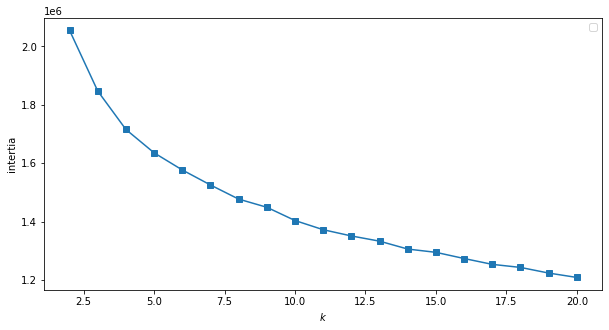

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(list(range(2, 21)), scores, "-s")
plt.xlabel("$k$")
plt.ylabel("intertia")
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state=42)
clusters = kmeans.fit_predict(cbb_players_prepared)

In [ ]:
# Apply the found clusters of the scaled data to the original data.
cbb_players_clustered = cbb_players_dropped.copy()
cbb_players_clustered["CLUSTER"] = clusters

In [ ]:
pd.set_option('display.expand_frame_repr', False)
for i in range(5):
  print(f"Cluster {i} Statistics:")
  print(cbb_players_clustered.loc[cbb_players_clustered["CLUSTER"] == i, :].describe())
  print()

Cluster 0 Statistics:
                GP      Min_per         Ortg          usg          eFG       TS_per      ORB_per      DRB_per      AST_per       TO_per          FTM          FTA       FT_per        twoPM        twoPA     twoP_per          TPM          TPA       TP_per      blk_per      stl_per          ftr           ht       porpag        adjoe          pfr         year      ast/tov      rimmade  rimmade+rimmiss      midmade  midmade+midmiss  rimmade/(rimmade+rimmiss)  midmade/(midmade+midmiss)    dunksmade  dunksmiss+dunksmade  dunksmade/(dunksmade+dunksmiss)  pick         drtg        adrtg      dporpag        stops          bpm         obpm         dbpm         gbpm           mp        ogbpm        dgbpm         oreb         dreb         treb          ast          stl          blk          pts  CLUSTER
count  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000  56

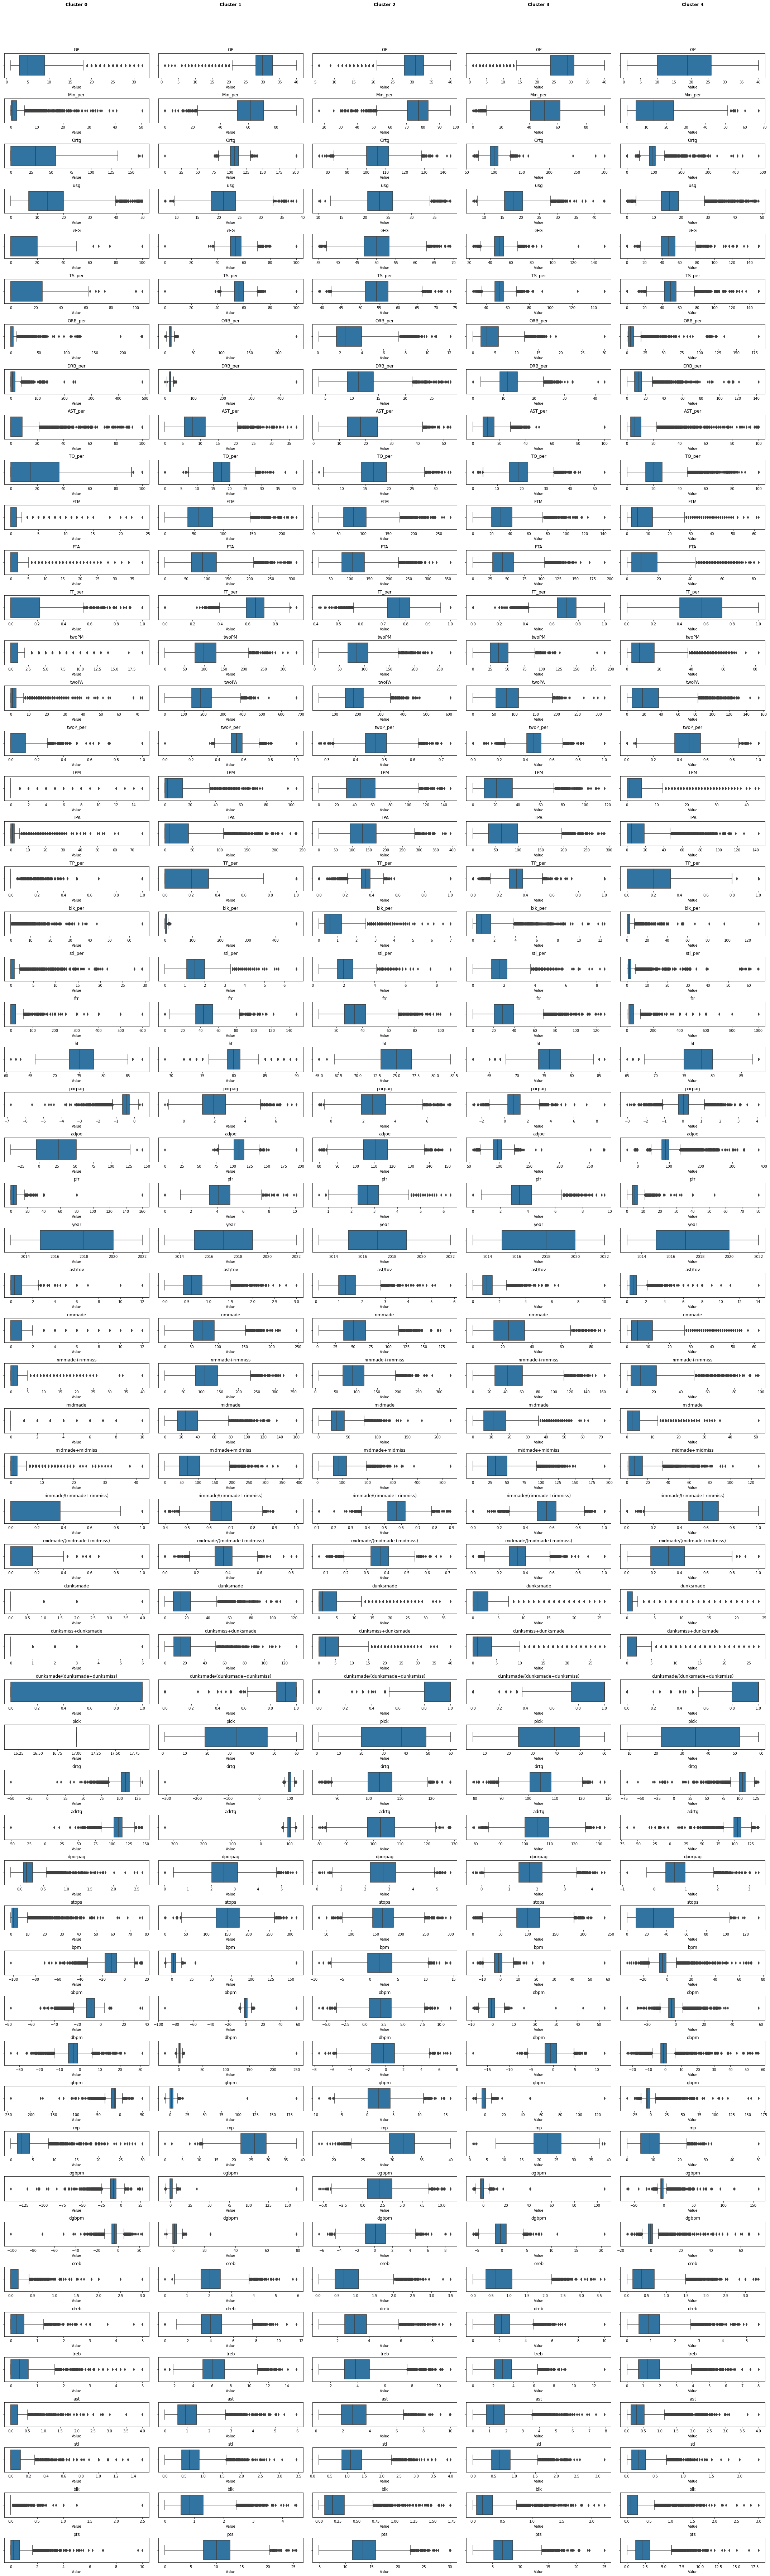

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = cbb_players_dropped.select_dtypes(include=[np.number]).columns

fig, ax = plt.subplots(len(numerical_columns)+1, 5, figsize=(30,100))

ax[0][0].axis("off")
ax[0][1].axis("off")
ax[0][2].axis("off")
ax[0][3].axis("off")
ax[0][4].axis("off")
ax[0][0].set_title("Cluster 0", fontweight='bold')
ax[0][1].set_title("Cluster 1", fontweight='bold')
ax[0][2].set_title("Cluster 2", fontweight='bold')
ax[0][3].set_title("Cluster 3", fontweight='bold')
ax[0][4].set_title("Cluster 4", fontweight='bold')


for (j, column) in enumerate(numerical_columns):
  for i in range(5):
    sns.boxplot(x=cbb_players_clustered.loc[cbb_players_clustered["CLUSTER"] == i, :][column], ax=ax[j+1][i])
    ax[j+1][i].set_title(column)
    ax[j+1][i].set_xlabel('Value')

fig.subplots_adjust(hspace=0.5, bottom=0.1)

plt.tight_layout()
plt.show()

As we can see from the statistics, Cluster 0 mainly consists of players that haven't played a lot of games in the seasons and minutes in a game in general.

Cluster 1 probably consists mainly of center players. They are quite tall, don't shoot many three-pointers but two-pointers instead, their rebound rate is higher and they don't have as many assists and steals as others. They also have more blocks, which is related to their body size.

In contrast, cluster 2 is probably made up of guards. They are not as tall, shoot a lot of three-pointers, their rebound rate is lower, and they have more assists and steals. They also don't block as many balls as the players in the other clusters.

Cluster 3 seems to relate to replacement players in general. Their stats for freethrows, three-pointers and two-pointers are not as high as in the other clusters. Besides that its hard to distinguish them. The less minutes played would then explain that they are very likely replacement players.

In comparison to cluster 0 the cluster 4 consists also of not as good performing players, but those are playing significant minutes in each game. Therefore, they probably role players whose impact is not reflected in the statistics.

## Step 4. Check if there is a correlation between BPM and the success of a team

Since we want to evaluate a player's performance based on box plus-minus (bpm), we want to check if this statistic actually reflects that. For this purpose, we first filter out all players who have not played at least 10 minutes in a game and also not at least 10 games in general. This will filter out outlierst, such as players that have an incredibly high bpm, but only played 1 minute in a game.

We then calculate the percentage of games won by a team in a certain year and the average bpm of all the remaining players in this team and try to find out if there is a correlation between these two metrics.

In [ ]:
# Filter out statistical outliers.
cbb_significant_players = cbb_players[(cbb_players["mp"] > 10) & (cbb_players["GP"] > 10)]

In [ ]:
# Calculate the average bpm of a team in a certain year based on the remaining players.
cbb_team_mean_bpm = cbb_significant_players[["team", "year", "bpm"]].groupby(["team", "year"]).mean().reset_index()

In [ ]:
# Display the results.
cbb_team_mean_bpm[cbb_team_mean_bpm["year"] == 2019].head(25)

,team,year,bpm
5,Abilene Christian,2019,-0.279533
15,Air Force,2019,-1.546441
25,Akron,2019,0.400225
35,Alabama,2019,2.703449
45,Alabama A&M,2019,-5.122155
55,Alabama St.,2019,-4.168172
65,Albany,2019,-2.408611
75,Alcorn St.,2019,-5.593247
85,American,2019,-0.879905
94,Appalachian St.,2019,-0.868754


In [ ]:
# Calculate the percentage of games won.
cbb_games["W_per"] = cbb_games["W"]/cbb_games["G"]

In [ ]:
# Copy the relevant columns into a new dataframe.
cbb_games_performance = cbb_games[["TEAM", "YEAR", "W_per"]]

In [ ]:
# Join the average bpm with the percentage of games won.
cbb_joined = pd.merge(cbb_team_mean_bpm, cbb_games_performance,  how='inner', left_on=['team','year'], right_on = ['TEAM','YEAR'])

In [ ]:
# Drop all NaN data
cbb_joined.dropna(axis=0, inplace=True)

In [ ]:
# Show the team and the year with the highest bpm.
cbb_joined[cbb_joined["bpm"] > 9]

,team,year,bpm,TEAM,YEAR,W_per
1011,Gonzaga,2021,9.159853,Gonzaga,2021,1.0


In [ ]:
# Display outliers on the winning percentage.
cbb_joined[cbb_joined["W_per"] > 1]

,team,year,bpm,TEAM,YEAR,W_per
2713,Southern Utah,2021,0.258585,Southern Utah,2021,1.052632


In [ ]:
# Display teams that lost every game in a certain year.
cbb_joined[cbb_joined["W_per"] == 0]

,team,year,bpm,TEAM,YEAR,W_per
1013,Grambling St.,2013,-10.910802,Grambling St.,2013,0.0
1015,Grambling St.,2015,-9.603113,Grambling St.,2015,0.0
2540,San Jose St.,2015,-5.594679,San Jose St.,2015,0.0


In [ ]:
# See how many rows have been filtered and matched in general.
print(cbb_team_mean_bpm.shape)
print(cbb_games_performance.shape)
print(cbb_joined.shape)

(3499, 3)
(3513, 3)
(3497, 6)


In [ ]:
# Calculate the correlation between those two metrics.
cbb_joined["W_per"].corr(cbb_joined["bpm"])

0.7429538536109135

As we can see here, a correlation of 0.743 strongly suggests that bpm filtered by contributing players is a good measure of a player's contribution to a team's success. We can also infer why the correlation is not higher: since there is a large level of uncertainty in sports in general, a team with statistically many good players may still be beaten by a statistically weaker team. In general, however, the high correlation validates the use of this statistic to filter out statistically bad players.

Next, let's visualize the linear correlation using a scatter plot. 

[]

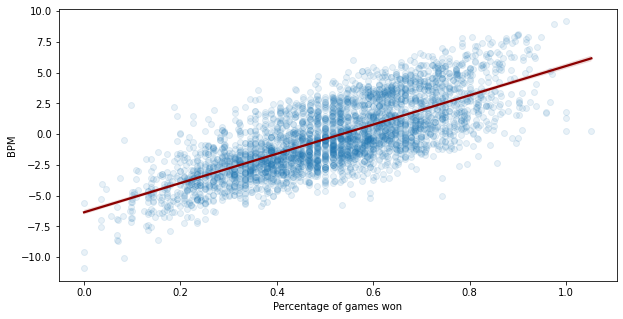

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

regplt = sns.regplot(x=cbb_joined["W_per"], y=cbb_joined["bpm"], scatter_kws={'alpha':0.1}, line_kws={"color": "darkred"})
regplt.figure.set_size_inches(10, 5)
regplt.set(xlabel='Percentage of games won', ylabel='BPM')

plt.plot()

## Step 5. Filter the player dataset for top notch players

Freshmans for which no data can be found in the dataset:

- Isaac McKneely
- Ryan Dunn
- Isaac Traudt
- Leon Bond III

In [46]:
uva_2023_players = ['Kihei Clark', 'Jayden Gardner', 'Reece Beekman', 'Armaan Franklin', 'Ben Vander Plas', 'Taine Murray', 'Chase Coleman', 'Kadin Shedrick', 'Francisco Caffaro', 'Tristan How']

cbb_current_uva_players = cbb_players[(cbb_players['player_name'].isin(uva_2023_players)) & (cbb_players['year'] == 2022)]
cbb_players_wo_uva = cbb_players[~cbb_players['player_name'].isin(uva_2023_players)]

Lets crosscheck if the players were correctly removed from the dataset:

In [47]:
cbb_players_wo_uva[(cbb_players_wo_uva['team'] == 'Virginia') & (cbb_players_wo_uva['year'] == 2022)]

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
61683,Kody Stattmann,Virginia,ACC,4,3.4,122.3,18.5,58.3,58.33,0.0,25.5,14.0,0.0,0,0,0.0,7,10,0.7,0,2,0.00,3.6,1.9,0.0,Sr,79.0,23,0.996050,119.02600,1.2,2022,65454,33.6,NaN,5.0,8.0,2.0,2.0,0.625,1.0,1.0,1.0,1.0,NaN,94.8389,93.4963,0.995736,6.747880,5.32784,2.37865,2.94919,6.76066,8.5000,3.19969,3.560970,0.000,1.7500,1.7500,0.5,0.250,0.25,3.500,PF/C
62410,Jayden Nixon,Virginia,ACC,3,0.4,0.0,0.0,0.0,0.00,0.0,31.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0.0,0.0,0.0,Sr,75.0,5,-0.427560,-7.15640,10.0,2022,67495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.8073,102.2590,0.115654,0.686582,-5.48927,-4.38298,-1.10629,-11.66170,1.3333,-12.47320,0.811487,0.000,0.3333,0.3333,0.0,0.000,0.00,0.000,PF/C
63966,Carson McCorkle,Virginia,ACC,8,2.2,139.1,16.0,50.0,50.00,6.4,16.9,34.0,0.0,0,0,0.0,1,1,1.0,1,4,0.25,0.0,3.0,0.0,So,75.0,33,0.460053,133.46700,1.8,2022,72527,71.8,NaN,0.0,0.0,1.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,97.7333,95.5849,0.302219,3.935890,9.28128,7.92897,1.35230,8.29657,2.7500,4.55532,3.741260,0.125,0.3750,0.5000,0.5,0.125,0.00,0.625,Pure PG
63968,Malachi Poindexter,Virginia,ACC,3,0.3,0.0,33.3,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,2,0.00,0.0,0.0,0.0,So,74.0,11,-0.319698,-6.87611,0.0,2022,72529,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,110.4860,114.3030,0.044947,0.278122,-29.06380,-18.20310,-10.86070,-39.31490,1.0000,-24.45390,-14.860900,0.000,0.0000,0.0000,0.0,0.000,0.00,0.000,Combo G


Lets now see the players we have data from in 2022. This is the data that we want to predict the position for in the end.

In [48]:
cbb_current_uva_players

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
61677,Kihei Clark,Virginia,ACC,25,84.6,100.4,21.5,45.9,49.92,1.0,6.6,25.3,19.1,47,64,0.734,65,145,0.448,20,62,0.323,0.1,1.4,30.9,Sr,69.0,0,2.399490,105.6960,1.4,2022,65442,21.6,2.132076,43.0,81.0,22.0,64.0,0.5309,0.3438,0.0,0.0,NaN,NaN,104.8530,98.6917,3.353220,111.166000,-0.251552,0.535486,-0.787038,-0.251848,34.0000,0.031213,-0.283061,0.2400,1.8000,2.0400,4.5200,0.7200,0.0400,9.4800,Scoring PG
62025,Jayden Gardner,Virginia,ACC,18,88.1,99.8,26.7,46.3,52.48,6.5,21.5,10.2,14.3,93,126,0.738,109,239,0.456,3,6,0.500,0.6,0.9,51.4,Sr,79.0,1,3.161580,111.0990,2.4,2022,66051,23.4,0.600025,58.0,110.0,51.0,129.0,0.5273,0.3953,1.0,2.0,0.5000,NaN,98.9279,97.3759,3.655360,121.212000,-1.523010,-1.023260,-0.499749,1.047220,35.1053,1.589590,-0.542372,2.0526,6.2632,8.3158,1.4211,0.5789,0.1579,18.2632,Wing F
62125,Francisco Caffaro,Virginia,ACC,17,11.6,102.6,13.7,50.0,59.70,10.8,12.7,3.0,28.9,8,10,0.800,6,12,0.500,0,0,0.000,1.0,0.0,83.3,Jr,84.0,22,0.255926,95.9721,5.5,2022,66230,76.0,0.285576,4.0,7.0,2.0,5.0,0.5714,0.4000,1.0,1.0,1.0000,NaN,104.8850,98.9929,0.674967,15.276000,-2.225900,-1.627170,-0.598728,-4.227890,6.8824,-4.206360,-0.021526,0.5294,0.7059,1.2353,0.1176,0.0000,0.0588,1.1765,C
62201,Ben Vander Plas,Ohio,MAC,24,84.8,106.7,20.0,53.6,55.94,2.7,16.9,18.5,19.3,38,49,0.776,60,112,0.536,50,140,0.357,1.8,2.4,19.4,Sr,80.0,5,2.514310,106.6190,2.9,2022,66356,NaN,1.620690,53.0,87.0,7.0,25.0,0.6092,0.2800,4.0,6.0,0.6667,NaN,99.8778,97.7791,3.469130,171.781000,4.938250,2.343870,2.594380,4.190090,33.8400,2.395520,1.794570,0.7600,5.0400,5.8000,3.7600,1.4400,0.6000,12.8400,Wing F
62796,Armaan Franklin,Virginia,ACC,22,59.5,97.4,21.2,51.7,54.67,2.3,13.8,15.6,20.1,40,54,0.741,51,118,0.432,36,85,0.424,0.9,2.3,26.6,Jr,76.0,2,2.069060,105.6040,3.7,2022,70565,70.0,0.979192,30.0,65.0,21.0,53.0,0.4615,0.3962,2.0,2.0,1.0000,NaN,100.3140,93.4586,3.436650,121.183000,3.826490,1.810460,2.016030,3.004420,30.1364,1.237610,1.766800,0.5909,3.5455,4.1364,2.1364,1.1818,0.2273,11.3636,Combo G
63099,Kadin Shedrick,Virginia,ACC,11,8.6,108.2,23.7,52.4,55.39,19.5,17.3,7.0,19.4,6,9,0.667,11,20,0.550,0,1,0.000,4.2,1.5,42.9,So,83.0,21,0.805782,115.2950,6.5,2022,71056,86.4,0.499908,7.0,13.0,4.0,7.0,0.5385,0.5714,2.0,2.0,1.0000,NaN,97.6609,93.2439,0.912343,15.427900,2.135750,0.733646,1.402100,-1.108280,7.8182,-1.375020,0.266737,1.0909,1.0909,2.1818,0.2727,0.1818,0.2727,2.5455,C
63525,Chase Coleman,Virginia,ACC,5,0.6,200.0,6.4,100.0,100.00,0.0,20.7,0.0,0.0,0,0,0.000,1,1,1.000,0,0,0.000,0.0,0.0,0.0,Jr,69.0,12,0.319281,161.9320,6.7,2022,71759,NaN,NaN,1.0,1.0,0.0,0.0,1.0000,NaN,0.0,0.0,NaN,NaN,102.7000,105.5890,0.090221,0.871996,-1.599290,0.585592,-2.184880,1.309400,1.2000,-1.059440,2.368840,0.0000,0.2000,0.2000,0.0000,0.0000,0.0000,0.4000,Wing G
64484,Reece Beekman,Virginia,ACC,25,73.0,99.6,13.6,42.3,46.95,1.0,11.1,18.0,19.1,25,33,0.758,33,73,0.452,9,37,0.243,1.7,2.7,30.0,So,75.0,2,0.811903,93.2649,2.0,2022,73240,87.4,2.586207,29.0,60.0,4.0,13.0,0.4833,0.3077,3.0,3.0,1.0000,NaN,99.3023,93.4674,3.425210,123.532000,3.714050,0.430333,3.283720,2.227860,29.3600,-1.113970,3.341830,0.2000,2.6400,2.8400,3.0000,1.2000,0.4000,4.7200,Combo G


Next, we are going to filter for top notch players in each position. We are going to take all players into account that play at least 10 minutes in each game and appeared in at least 10 games in general as described in Step 4. We then filter for the top quarter of players in each position according to BPM.

In [49]:
cbb_players_by_role = {}

for role in cbb_players_wo_uva["role"].value_counts().index:
  cbb_players_by_role[role] = cbb_players_wo_uva[cbb_players_wo_uva['role'] == role]

In [50]:
cbb_players_by_role_filtered = {}

for role, dataset in cbb_players_by_role.items():
  third_percentile = dataset["bpm"].quantile(q=0.75)
  print(f"role: {role} \t third_percentile: {third_percentile}")
  cbb_players_by_role_filtered[role] = dataset[(dataset["mp"] > 10) & (dataset["GP"] > 10) & (dataset["bpm"] >= third_percentile)].sort_values("bpm", ascending=False)

role: Wing G 	 third_percentile: 1.09398
role: PF/C 	 third_percentile: 0.6241185
role: Combo G 	 third_percentile: 1.24445
role: C 	 third_percentile: 1.86421
role: Scoring PG 	 third_percentile: 1.623
role: Wing F 	 third_percentile: 1.99295
role: Stretch 4 	 third_percentile: 1.9771375
role: Pure PG 	 third_percentile: 2.4415975000000003


In [51]:
for (role, dataset_before), dataset_filtered in zip(cbb_players_by_role.items(), cbb_players_by_role_filtered.values()):
  print(f"Role: {role} \t #Players before: {len(dataset_before)} \t #Players after filtering: {len(dataset_filtered)} \t Percentage: {len(dataset_filtered)/len(dataset_before)}")

Role: Wing G 	 #Players before: 10451 	 #Players after filtering: 2316 	 Percentage: 0.2216055879820113
Role: PF/C 	 #Players before: 8288 	 #Players after filtering: 1589 	 Percentage: 0.19172297297297297
Role: Combo G 	 #Players before: 7405 	 #Players after filtering: 1666 	 Percentage: 0.224983119513842
Role: C 	 #Players before: 6502 	 #Players after filtering: 1284 	 Percentage: 0.19747769916948632
Role: Scoring PG 	 #Players before: 4633 	 #Players after filtering: 1004 	 Percentage: 0.21670623785883877
Role: Wing F 	 #Players before: 4105 	 #Players after filtering: 927 	 Percentage: 0.22582216808769792
Role: Stretch 4 	 #Players before: 2856 	 #Players after filtering: 634 	 Percentage: 0.22198879551820727
Role: Pure PG 	 #Players before: 2110 	 #Players after filtering: 271 	 Percentage: 0.12843601895734597


In [52]:
list_of_datasets = list(cbb_players_by_role_filtered.values())

top_notch_cbb_players = pd.concat(list_of_datasets)

Let's look at approximately how many unique players are left in our dataset.

In [53]:
len(top_notch_cbb_players["player_name"].value_counts())

5016

Let's also examine which players have the lowest BPM in our filtered dataset.

In [54]:
top_notch_cbb_players.sort_values('bpm', ascending=True).head(10)

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
44974,Osasumwen Osaghae,FIU,CUSA,25,25.3,113.2,14.7,63.3,61.40,10.3,20.9,0.6,15.5,25,46,0.543,31,49,0.633,0,0,0.000,11.5,1.3,93.9,So,79.0,34,0.744514,105.4460,6.6,2018,49216,NaN,0.076843,29.0,41.0,2.0,8.0,0.7073,0.2500,10.0,12.0,0.8333,NaN,95.0782,96.2915,1.37152,71.6182,0.629829,-3.454020,4.083850,0.271531,11.8889,-2.220160,2.491690,1.1111,2.2222,3.3333,0.0370,0.2593,1.2222,3.2963,PF/C
47819,Grant Golden,Richmond,A10,33,78.6,102.3,31.5,52.2,54.75,3.1,24.4,26.2,15.0,109,166,0.657,205,385,0.532,16,54,0.296,3.9,0.9,37.8,So,82.0,33,3.305040,117.7680,2.4,2019,45309,11.0,1.426875,122.0,173.0,78.0,200.0,0.7052,0.3900,3.0,4.0,0.7500,NaN,104.8560,106.8460,2.46569,190.3800,0.629962,0.413183,0.216779,1.981420,31.4242,2.619600,-0.638174,0.7879,6.2727,7.0606,3.5455,0.4545,1.0606,17.1818,PF/C
40707,Demario Beck,Coastal Carolina,SB,37,65.6,102.8,19.6,49.4,49.90,10.0,20.4,4.7,13.0,47,92,0.511,112,193,0.580,27,116,0.233,4.6,1.4,29.8,Jr,80.0,20,1.401870,102.3210,4.2,2017,45622,NaN,0.531906,88.0,136.0,24.0,57.0,0.6471,0.4211,15.0,15.0,1.0000,NaN,101.3470,101.7590,2.47573,209.1970,0.633667,-0.371068,1.004730,0.302722,26.2564,0.416863,-0.114141,2.6410,5.2308,7.8718,0.6410,0.6410,0.9744,10.0000,PF/C
29781,Nate Kratch,Santa Clara,WCC,30,53.4,105.4,16.5,52.6,53.65,13.1,13.6,3.8,17.3,35,64,0.547,59,106,0.557,1,9,0.111,3.6,1.6,55.7,So,78.0,43,1.220810,101.8860,6.7,2015,31130,NaN,0.354872,47.0,73.0,12.0,33.0,0.6438,0.3636,2.0,2.0,1.0000,NaN,107.7120,104.1280,1.72381,105.2180,0.642737,-0.209314,0.852051,-2.760960,21.0312,-2.273670,-0.487288,2.2188,2.3438,4.5625,0.3438,0.5000,0.6562,5.1562,PF/C
20434,Brandon Sherrod,Yale,Ivy,21,32.0,100.2,19.3,49.4,52.64,7.6,18.0,7.1,17.2,39,67,0.582,42,85,0.494,0,0,0.000,7.0,1.2,78.8,So,78.0,35,0.885182,98.3288,5.2,2013,21871,NaN,0.549979,32.0,54.0,10.0,31.0,0.5926,0.3226,3.0,5.0,0.6000,NaN,101.6980,103.1360,1.39715,70.1176,0.643964,-1.289220,1.933180,-0.767666,18.0000,-1.194240,0.426576,1.1429,2.4762,3.6190,0.5238,0.3333,1.0476,5.8571,PF/C
35761,Niels Bunschoten,Indiana St.,MVC,31,35.9,104.2,15.6,51.3,55.59,3.2,8.9,6.0,16.2,26,31,0.839,28,44,0.636,20,69,0.290,4.1,0.9,27.4,Jr,81.0,12,0.671906,100.4280,7.1,2016,40099,NaN,0.599969,16.0,22.0,12.0,22.0,0.7273,0.5455,3.0,3.0,1.0000,NaN,100.5150,100.6860,1.41017,78.3499,0.645697,-0.943867,1.589560,-0.466738,14.5484,-2.070910,1.604170,0.4516,1.1613,1.6129,0.3871,0.2258,0.5484,4.5806,PF/C
32866,C.J. Neumann,Wofford,SC,30,74.2,108.2,11.3,50.9,55.93,8.0,22.1,6.7,20.3,44,62,0.710,56,108,0.519,0,2,0.000,1.1,1.7,56.4,Sr,79.0,31,0.645702,93.2308,3.2,2016,26422,NaN,0.911762,43.0,71.0,13.0,37.0,0.6056,0.3514,7.0,7.0,1.0000,NaN,105.5590,105.9120,2.37207,163.2330,0.648595,-1.186690,1.835280,-0.934687,30.0333,-1.240240,0.305551,1.9000,5.0667,6.9667,1.0333,0.8333,0.3000,5.2000,PF/C
32703,Tristian Curtis,Coastal Carolina,BSth,29,60.8,117.5,11.6,66.0,65.09,10.1,19.5,2.6,19.9,29,50,0.580,68,103,0.660,0,0,0.000,2.0,0.9,48.5,Sr,79.0,21,1.241150,101.1700,4.4,2016,24983,NaN,0.344800,57.0,74.0,11.0,29.0,0.7703,0.3793,3.0,4.0,0.7500,NaN,98.4253,100.8450,2.45507,141.1310,0.654388,-0.750572,1.404960,-0.088923,25.2759,-0.803714,0.714790,2.2759,4.7586,7.0345,0.3448,0.3793,0.4483,5.6897,PF/C
25949,Greg Dotson,Morehead St.,OVC,27,34.0,110.4,14.2,48.8,54.65,6.8,8.2,9.0,17.0,37,52,0.712,42,78,0.538,0,8,0.000,3.4,1.7,60.5,Fr,77.0,30,0.590168,98.2654,4.1,2014,29487,NaN,1.052579,38.0,63.0,4.0,15.0,0.6032,0.2667,14.0,17.0,0.8235,NaN,105.2260,105.6000,1.34318,73.4713,0.655048,-0.734102,1.389150,0.180256,16.4444,-0.586494,0.766750,0.9630,1.1111,2.074

In [55]:
df = pd.DataFrame(columns=top_notch_cbb_players.columns.insert(0, "YEAR"))

for yr in range(2009, 2023):
  res1 = top_notch_cbb_players[top_notch_cbb_players["year"] == yr].isna().sum()
  res1["YEAR"] = yr
  df = df.append(res1, ignore_index = True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df

<ipython-input-55-c58ab0efd831>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,YEAR,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
0,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0,853.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,423.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,872.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,221.0,898.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,902.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0,902.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To better see how the distribution of our players has changed through the filtering process, we will show some distribution graphs.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

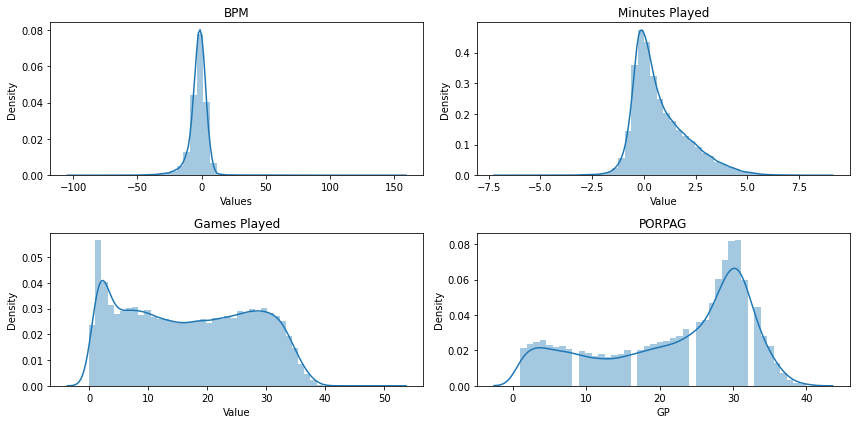

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12,6))

sns.distplot(cbb_players['bpm'], ax=ax[0][0])
ax[0][0].set_title('BPM')
ax[0][0].set_xlabel('Values')

sns.distplot(cbb_players['porpag'], ax=ax[0][1])
ax[1][1].set_title('PORPAG')
ax[1][1].set_xlabel('Value')

sns.distplot(cbb_players['mp'], ax=ax[1][0])
ax[0][1].set_title('Minutes Played')
ax[0][1].set_xlabel('Value')

sns.distplot(cbb_players['GP'], ax=ax[1][1])
ax[1][0].set_title('Games Played')
ax[1][0].set_xlabel('Value')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

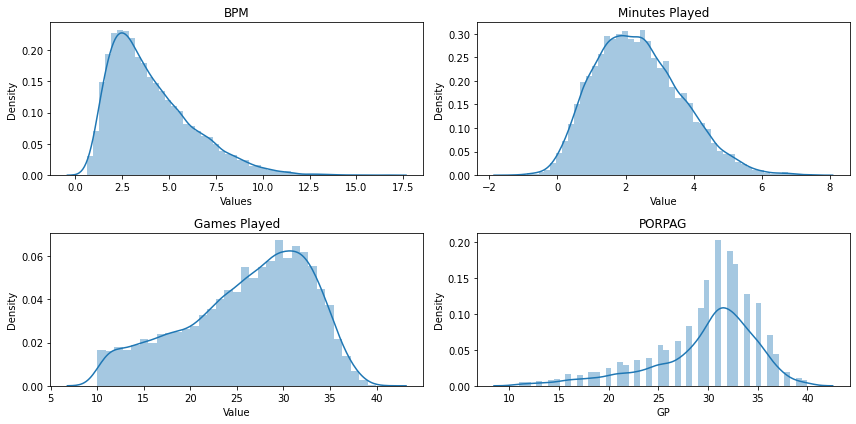

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12,6))

sns.distplot(top_notch_cbb_players['bpm'], ax=ax[0][0])
ax[0][0].set_title('BPM')
ax[0][0].set_xlabel('Values')

sns.distplot(top_notch_cbb_players['porpag'], ax=ax[0][1])
ax[1][1].set_title('PORPAG')
ax[1][1].set_xlabel('Value')

sns.distplot(top_notch_cbb_players['mp'], ax=ax[1][0])
ax[0][1].set_title('Minutes Played')
ax[0][1].set_xlabel('Value')

sns.distplot(top_notch_cbb_players['GP'], ax=ax[1][1])
ax[1][0].set_title('Games Played')
ax[1][0].set_xlabel('Value')

plt.tight_layout()
plt.show()

## Step 6. Train models to classify the most reasonable position based on a players stats

As we now have filtered our players dataset to only include top players, we will now split a test dataset from it, drop irrelevant features, extract the labels and process the features with a standardized pipeline.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin


top_notch_cbb_players_labels = top_notch_cbb_players[["role"]]
cbb_current_uva_players_labels = cbb_current_uva_players[["role"]]
y_players = cbb_current_uva_players_labels

# Split the housing data to a train set and a test set
columns_to_drop = ["player_name", "team",	"conf", "num", "pid", "Rec Rank", "role", "year", "yr"]

top_notch_cbb_players_dropped = top_notch_cbb_players.drop(columns=columns_to_drop)
cbb_current_uva_players_dropped = cbb_current_uva_players.drop(columns=columns_to_drop)


cat_attribs = top_notch_cbb_players_dropped.select_dtypes(exclude=[np.number]).columns
num_attribs = top_notch_cbb_players_dropped.select_dtypes(include=[np.number]).columns

print(cat_attribs)

X_train, X_test, y_train, y_test = train_test_split(top_notch_cbb_players_dropped, top_notch_cbb_players_labels, test_size=0.2, random_state=42)

y_train_prepared = y_train.to_numpy().flatten()
y_test_prepared = y_test.to_numpy().flatten()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
X_players_prepared = full_pipeline.transform(cbb_current_uva_players_dropped)

Index([], dtype='object')


### Model 1. SVM

The first model that we want to try is SVM. In order to find the dimensionality of our dataset, we are going to try linear, polynomial and Gaussian RBF SVMs and optimize their hyperparameters using RandomizedSearchCV.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameters that we will try for the linear SVM.
linear_param_distribs = {
    'C': uniform(0.01, 500),
}

# Define the parameters that we will try for the polynomial kernel.
polynomial_param_distribs = [
    {
        'C': uniform(0.01, 500),
        'degree': randint(low=2, high=7),
        'gamma': ['scale', 'auto'],
        'coef0': uniform(0, 70)
    }, {
        'C': uniform(0, 500),
        'degree': randint(low=2, high=7),
        'gamma': uniform(0.01, 3),
        'coef0': uniform(0, 70)
    }
]
    
# Define the parameters that we will try for the rbf kernel.
rbf_param_distribs = [
    {
        'C': uniform(0.01, 500),
        'gamma': ['scale', 'auto']
    }, {
        'C': uniform(0.01, 500),
        'gamma': uniform(0.01, 3)
    }
]

# Set up the different SVC instances.
#svc_linear = SVC(kernel='linear', random_state=42)
svc_polynomial = SVC(kernel='poly', random_state=42)
svc_rbf = SVC(kernel='rbf', random_state=42)

# Try 100 different combinations of the parameters on the linear SVM and score them using f1 score and 5-fold cross validation.
#linear_rnd_search = RandomizedSearchCV(svc_linear, param_distributions=linear_param_distribs,
#                                       n_iter=1, cv=5, scoring='f1_micro', random_state=42, n_jobs=-1)

#linear_rnd_search.fit(X_train_prepared, y_train_prepared)

# Try 100 different combinations of the parameters on the polynomial-kernel SVM and score them using f1 score and 5-fold cross validation.
polynomial_rnd_search = RandomizedSearchCV(svc_polynomial, param_distributions=polynomial_param_distribs,
                                       n_iter=25, cv=5, scoring='f1_micro', random_state=42, n_jobs=-1)

polynomial_rnd_search.fit(X_train_prepared, y_train_prepared)

# Try 100 different combinations of the parameters on the rbf-kernel SVM and score them using f1 score and 5-fold cross validation.
rbf_rnd_search = RandomizedSearchCV(svc_rbf, param_distributions=rbf_param_distribs,
                                       n_iter=25, cv=5, scoring='f1_micro', random_state=42, n_jobs=-1)

rbf_rnd_search.fit(X_train_prepared, y_train_prepared)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=25, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd2f7288730>,
                                         'gamma': ['scale', 'auto']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd2f7eaafa0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd2f726eb20>}],
                   random_state=42, scoring='f1_micro')

In [ ]:
results = [("Polynomial Model", polynomial_rnd_search.cv_results_),
#           ("Linear Model", linear_rnd_search.cv_results_),
           ("RBF Model", rbf_rnd_search.cv_results_)]

for model, cv_res in results:
  print(f"-----{model}-----")
  for score, params in sorted(zip(cv_res["mean_test_score"], cv_res["params"]), key = lambda x: x[0], reverse=True)[:30]:
    print(score, params)

-----Polynomial Model-----
0.8895767558911004 {'C': 55.455410405915664, 'coef0': 30.753555130603907, 'degree': 4, 'gamma': 'scale'}
0.8894483059836527 {'C': 491.62544290339406, 'coef0': 32.6734025273586, 'degree': 6, 'gamma': 'scale'}
0.8893187745679165 {'C': 300.5675058716044, 'coef0': 49.56508044572318, 'degree': 6, 'gamma': 'auto'}
0.8885449137913104 {'C': 86.69232675388605, 'coef0': 27.374242530126857, 'degree': 3, 'gamma': 'auto'}
0.8881578170171169 {'C': 355.680976374325, 'coef0': 55.31228783718439, 'degree': 4, 'gamma': 'scale'}
0.8880289511449428 {'C': 140.47725484369036, 'coef0': 37.988725821077395, 'degree': 2, 'gamma': 'scale'}
0.8877708866288139 {'C': 228.04499210851796, 'coef0': 54.96231729751095, 'degree': 4, 'gamma': 'auto'}
0.8864810632058402 {'C': 484.8023138822793, 'coef0': 54.25929763527802, 'degree': 3, 'gamma': 'auto'}
0.8837726336806639 {'C': 398.2814934301164, 'coef0': 12.840435290631465, 'degree': 6, 'gamma': 'scale'}
0.8836438510014352 {'C': 222.92637642679557,

The parameters for the best score from above:

0.8895767558911004 {'C': 55.455410405915664, 'coef0': 30.753555130603907, 'degree': 4, 'gamma': 'scale'}

Let's see how this polynomial SVM performs on our test dataset.


In [61]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_model = SVC(C=55.45, coef0=30.75, degree=4, gamma='scale', kernel='poly', random_state=42)
svc_model.fit(X_train_prepared, y_train_prepared)

y_test_pred = svc_model.predict(X_test_prepared)
conf_matrix = confusion_matrix(y_test_prepared, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)
print()
print("Classification Report:")
print(classification_report(y_test_prepared, y_test_pred))

Confusion Matrix:
[[229   0  16   0   0   0   0   0]
 [  0 323   0   0   8   0   0  19]
 [ 15   0 265   0   0  15   5   0]
 [  0   0   0  59   2   0   0   0]
 [  0   7   0   5 187   0   0   0]
 [  0   0  11   0   0 110   7   0]
 [  0   0   9   0   0   6 146  16]
 [  0  18   1   0   0   2  18 440]]

Classification Report:
              precision    recall  f1-score   support

           C       0.94      0.93      0.94       245
     Combo G       0.93      0.92      0.93       350
        PF/C       0.88      0.88      0.88       300
     Pure PG       0.92      0.97      0.94        61
  Scoring PG       0.95      0.94      0.94       199
   Stretch 4       0.83      0.86      0.84       128
      Wing F       0.83      0.82      0.83       177
      Wing G       0.93      0.92      0.92       479

    accuracy                           0.91      1939
   macro avg       0.90      0.91      0.90      1939
weighted avg       0.91      0.91      0.91      1939



Lets plot the confusion matrix to better understand the confusion matrix.

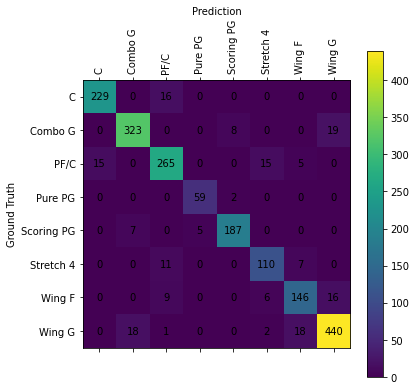

In [67]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
cax = ax.matshow(conf_matrix)
fig.colorbar(cax)

classes = ["C", "Combo G", "PF/C", "Pure PG", "Scoring PG", "Stretch 4", "Wing F", "Wing G"]

ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth') 
ax.xaxis.set_label_position('top') 
plt.xticks(range(0, 8))
plt.yticks(range(0, 8))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

for (i, j), z in np.ndenumerate(conf_matrix):
  ax.text(j, i, z, ha='center', va='center')

plt.show()

These results are very promising. With an overall F1-Score of 91% we can go ahead with this model and try to predict our UVA players position with it.

In [ ]:
y_players_pred = svc_model.predict(X_players_prepared)

In [ ]:
y_players_pred

array(['Scoring PG', 'PF/C', 'C', 'Wing G', 'Combo G', 'C', 'Wing G',
       'Combo G'], dtype=object)

In [ ]:
result = cbb_current_uva_players[['player_name', 'role']]
result['predicted_role'] = y_players_pred.tolist()

<ipython-input-76-066db420b1a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['predicted_role'] = y_players_pred.tolist()


In [ ]:
result

,player_name,bpm,role,predicted_role
57042,Kihei Clark,-0.251552,Scoring PG,Scoring PG
57430,Jayden Gardner,-1.523010,Wing F,PF/C
57545,Francisco Caffaro,-2.225900,C,C
57625,Ben Vander Plas,4.938250,Wing F,Wing G
58369,Armaan Franklin,3.826490,Combo G,Combo G
58726,Kadin Shedrick,2.135750,C,C
59220,Chase Coleman,-1.599290,Wing G,Wing G
60383,Reece Beekman,3.714050,Combo G,Combo G


The model predicted 6 out of the 8 players in their right position. However the prediction differs for Jayden Gardner and Ben Vander Plas. We are going to evaluate the validity of these results in our final report.

### Model 2. RandomForest

The next model that we want to try is Random Forest. We are also going to use RandomizedSearchCV to find the best hyperparameters for this model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameters that we will try for the random forest.
linear_param_distribs = [
    {
      'n_estimators': randint(10, 1000),
      'criterion': ['gini', 'entropy'],
      'bootstrap': [True, False]
    }, {
      'n_estimators': randint(10, 1000),
      'criterion': ['gini', 'entropy'],
      'max_depth': randint(10, 400),
      'bootstrap': [True, False]
    }
]

# Set up the different SVC instances.
rf_classifier = RandomForestClassifier(random_state=42)

# Try 300 different combinations of the parameters on the RandomForest and score them using f1 score and 5-fold cross validation.
linear_rnd_search = RandomizedSearchCV(rf_classifier, param_distributions=linear_param_distribs,
                                       n_iter=35, cv=5, scoring='f1_micro', random_state=42, n_jobs=-1)

linear_rnd_search.fit(X_train_prepared, y_train_prepared)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=35, n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['gini', 'entropy'],
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff54ba25b80>},
                                        {'bootstrap': [True, False],
                                         'criterion': ['gini', 'entropy'],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff54b967670>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff54ba25f10>}],
                   random_state=42, scoring='f1_micro')

In [ ]:
cv_res = linear_rnd_search.cv_results_
print(f"-----Random Forest Classifier-----")
for score, params in sorted(zip(cv_res["mean_test_score"], cv_res["params"]), key = lambda x: x[0], reverse=True)[:30]:
  print(score, params)

-----Random Forest Classifier-----
0.853844470788877 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 319, 'n_estimators': 486}
0.8534574572076288 {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 501}
0.8533284249495642 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 140, 'n_estimators': 671}
0.8531995590773903 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 201, 'n_estimators': 965}
0.8530702772404901 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 279, 'n_estimators': 872}
0.8529412449824255 {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 514}
0.8528125454961419 {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 734}
0.8525547305588488 {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 565}
0.8499745845552296 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 280, 'n_estimators': 199}
0.8498453859112747 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 261, 'n_estimators': 197}
0.848427029

Through multiple iterations with RandomizedSearchCV, we have found that the optimal hyperparameters for our model are:

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 199, 'n_estimators': 493}

Lets test next, how this model performs on our test set.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=42, bootstrap=False, criterion='entropy', max_depth=199, n_estimators=493)
rf_model.fit(X_train_prepared, y_train_prepared)

y_test_pred = rf_model.predict(X_test_prepared)
conf_matrix = confusion_matrix(y_test_prepared, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)
print()
print("Classification Report:")
print(classification_report(y_test_prepared, y_test_pred))

Confusion Matrix:
[[228   0  17   0   0   0   0   0]
 [  0 291   0   0  19   0   0  40]
 [  4   0 290   0   0   5   0   1]
 [  0   0   0  45  16   0   0   0]
 [  0  20   0   0 177   0   0   2]
 [  0   0  18   0   0  93  14   3]
 [  0   0  23   0   0   9 119  26]
 [  0  19   3   0   0   0   4 453]]

Classification Report:
              precision    recall  f1-score   support

           C       0.98      0.93      0.96       245
     Combo G       0.88      0.83      0.86       350
        PF/C       0.83      0.97      0.89       300
     Pure PG       1.00      0.74      0.85        61
  Scoring PG       0.83      0.89      0.86       199
   Stretch 4       0.87      0.73      0.79       128
      Wing F       0.87      0.67      0.76       177
      Wing G       0.86      0.95      0.90       479

    accuracy                           0.87      1939
   macro avg       0.89      0.84      0.86      1939
weighted avg       0.88      0.87      0.87      1939



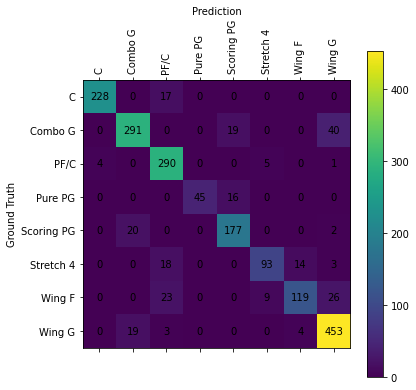

In [72]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
cax = ax.matshow(conf_matrix)
fig.colorbar(cax)

classes = ["C", "Combo G", "PF/C", "Pure PG", "Scoring PG", "Stretch 4", "Wing F", "Wing G"]

ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth') 
ax.xaxis.set_label_position('top') 
plt.xticks(range(0, 8))
plt.yticks(range(0, 8))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

for (i, j), z in np.ndenumerate(conf_matrix):
  ax.text(j, i, z, ha='center', va='center')

plt.show()

Although an F1-Score of 87% is not as high as the polynomial SVM, the model is still quite accurate. We can therefore try to predict the position of the UVA player's with it.

In [ ]:
y_players_pred = rf_model.predict(X_players_prepared)

In [ ]:
y_players_pred

array(['Scoring PG', 'PF/C', 'PF/C', 'Wing G', 'Wing G', 'C', 'Wing G',
       'Combo G'], dtype=object)

In [ ]:
result = cbb_current_uva_players[['player_name', 'bpm', 'role']]
result['predicted_role'] = y_players_pred.tolist()

<ipython-input-74-65414a4d974a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['predicted_role'] = y_players_pred.tolist()


In [ ]:
result

,player_name,bpm,role,predicted_role
61677,Kihei Clark,-0.251552,Scoring PG,Scoring PG
62025,Jayden Gardner,-1.523010,Wing F,PF/C
62125,Francisco Caffaro,-2.225900,C,PF/C
62201,Ben Vander Plas,4.938250,Wing F,Wing G
62796,Armaan Franklin,3.826490,Combo G,Wing G
63099,Kadin Shedrick,2.135750,C,C
63525,Chase Coleman,-1.599290,Wing G,Wing G
64484,Reece Beekman,3.714050,Combo G,Combo G


We can see that the model predicted four of the players to play in their position, but the results differ for the other four. This could be due to the lower accuracy compared to polynomial SVM. Interestingly, however, the model is consistent with the prediction of the divergent position by Ben Vander Plas and Jayden Gardner.

## Step 7. Conclusion

The evaluation and conclusion of our results can be found in the final report of our project. This work has been a part of the “Machine Learning for Virginia” project at the University of Virginia.